# Loading the dataset and visualizing it

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new sets
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

print("\nValidation set shape:", x_val.shape)
print("Validation set shape:", y_val.shape)

print("\nTest set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# # Plot first 10 samples
# plt.figure(figsize=(10, 10))
# for i in range(20):
#     plt.subplot(4, 5, i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[y_train[i]])
# plt.show()

# # Print labels for first 10 samples
# print("\nLabels for the first 10 samples:")
# for i in range(20):
#     print(f"Sample {i+1}: {class_names[y_train[i]]} (class {y_train[i]})")

Training set shape: (48000, 28, 28)
Training labels shape: (48000,)

Validation set shape: (12000, 28, 28)
Validation set shape: (12000,)

Test set shape: (10000, 28, 28)
Test labels shape: (10000,)


In [8]:
y_val[:5]

array([8, 8, 7, 4, 8], dtype=uint8)

# Normalize and reshape the data

In [9]:
# #Normalize the data

x_train = (x_train - 0.2860) / 0.3530
x_val = (x_val - 0.2860) / 0.3530
x_test = (x_test - 0.2860) / 0.3530


In [10]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train[0].shape

(28, 28, 1)

# Developing the CNN - layer by layer

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Complie and fit the CNN - Baseline

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
baseline_cnn = cnn.fit(x_train, y_train,
                  validation_data=(x_val, y_val),
                  epochs=50,
                  batch_size=32)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9176 - loss: 0.2167 - val_accuracy: 0.8880 - val_loss: 0.3376
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9193 - loss: 0.2123 - val_accuracy: 0.8833 - val_loss: 0.3780
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9246 - loss: 0.1972 - val_accuracy: 0.8898 - val_loss: 0.3338
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9279 - loss: 0.1918 - val_accuracy: 0.8908 - val_loss: 0.3561
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9295 - loss: 0.1881 - val_accuracy: 0.8907 - val_loss: 0.3650
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9320 - loss: 0.1786 - val_accuracy: 0.8813 - val_loss: 0.4289
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9314 - loss: 0.1762 - val_accuracy: 0.8892 - val_loss: 0.3715
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9368 - loss: 0.1669 - 

# Training and Validation metrics for Baseline CNN

Final training accuracy: 0.9630
Final validation accuracy: 0.8906
Final training loss: 0.1087
Final validation loss: 1.0866


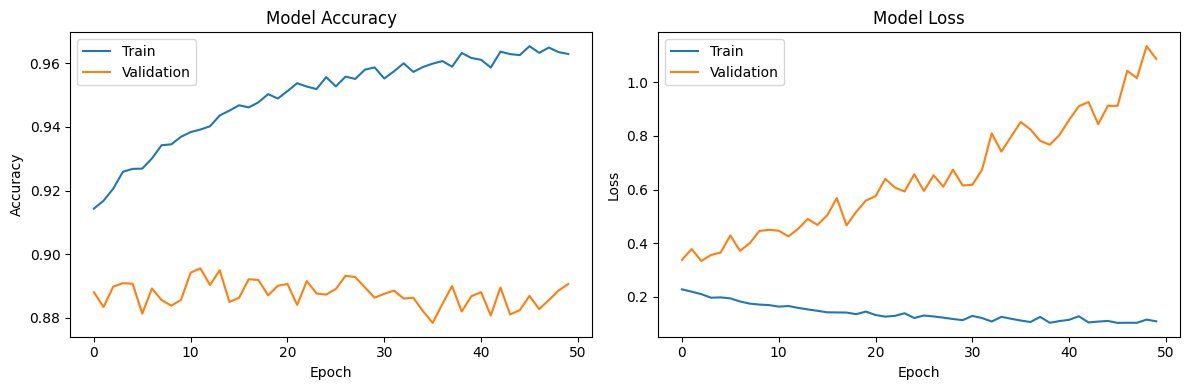

In [64]:
print(f"Final training accuracy: {baseline_cnn.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {baseline_cnn.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {baseline_cnn.history['loss'][-1]:.4f}")
print(f"Final validation loss: {baseline_cnn.history['val_loss'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_cnn.history['accuracy'])
plt.plot(baseline_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(baseline_cnn.history['loss'])
plt.plot(baseline_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [65]:
# cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8834 - loss: 1.1341


[1.1394610404968262, 0.8837000131607056]

# Classification report for Baseline CNN

In [66]:
# from sklearn.metrics import confusion_matrix , classification_report

# y_pred_cnn = cnn.predict(x_test)

# y_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
# print("Classification Report: \n", classification_report(y_test, y_classes_cnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.84      0.81      1000
           3       0.88      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.58      0.64      1000
           7       0.95      0.96      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



# AlexNet Implementation

In [21]:
from tensorflow.keras import layers, models

def create_alexnet():
    model = models.Sequential([
        # First Convolutional Layer
        layers.Conv2D(filters=96, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

        # Second Convolutional Layer
        layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

        # Third Convolutional Layer
        layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),

        # Fourth Convolutional Layer
        layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),

        # Fifth Convolutional Layer
        layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

        # Flatten layer
        layers.Flatten(),

        # Fully connected layers
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    return model

alexnet = create_alexnet()
alexnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
alexnet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 26, 26, 96)          │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 13, 13, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 13, 13, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4096)                │       9,441,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,583,562 (112.85 MB)

 Trainable params: 29,583,562 (112.85 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
baseline_alexnet = alexnet.fit(x_train, y_train,
                              batch_size=128,
                              epochs=50,
                              validation_data=(x_val, y_val),
                              verbose=1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9280 - loss: 0.1934 - val_accuracy: 0.8967 - val_loss: 0.3124
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9295 - loss: 0.1953 - val_accuracy: 0.9012 - val_loss: 0.2956
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9311 - loss: 0.1933 - val_accuracy: 0.9027 - val_loss: 0.2954
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.9306 - loss: 0.1973 - val_accuracy: 0.9050 - val_loss: 0.3048
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9349 - loss: 0.1853 - val_accuracy: 0.9050 - val_loss: 0.3182
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9384 - loss: 0.1724 - val_accuracy: 0.9053 - val_loss: 0.3025
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9391 - loss: 0.1719 - val_accuracy: 0.8989 - val_loss: 0.3155
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.9367 - loss: 0.1822 - 

Final training accuracy: 0.9721
Final validation accuracy: 0.9028
Final training loss: 0.0984
Final validation loss: 0.6197


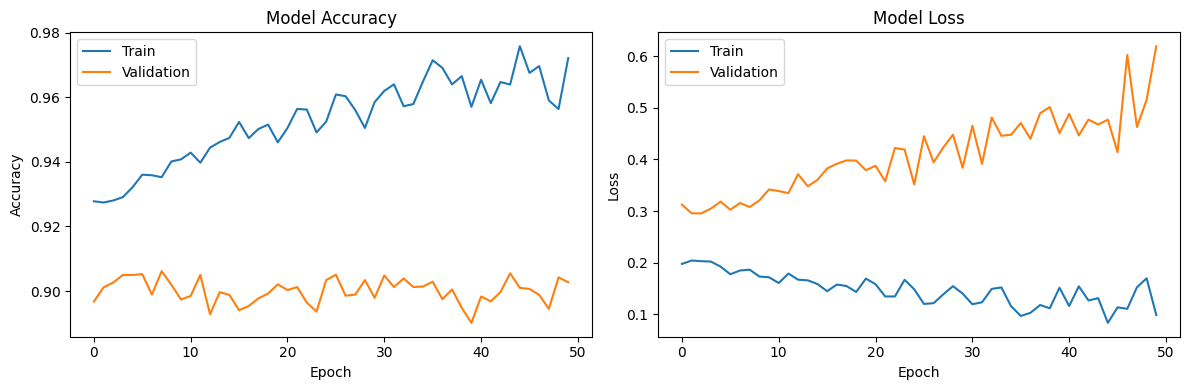

In [31]:
print(f"Final training accuracy: {baseline_alexnet.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {baseline_alexnet.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {baseline_alexnet.history['loss'][-1]:.4f}")
print(f"Final validation loss: {baseline_alexnet.history['val_loss'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_alexnet.history['accuracy'])
plt.plot(baseline_alexnet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(baseline_alexnet.history['loss'])
plt.plot(baseline_alexnet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [45]:
# alexnet.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8971 - loss: 0.7481


[0.7592343688011169, 0.8942999839782715]

In [46]:
# from sklearn.metrics import confusion_matrix , classification_report

# y_pred_alexnet = alexnet.predict(x_test)

# y_classes_alexnet = [np.argmax(element) for element in y_pred_alexnet]
# print("Classification Report: \n", classification_report(y_test, y_classes_alexnet))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.88      0.84      1000
           3       0.87      0.92      0.89      1000
           4       0.84      0.83      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.75      0.61      0.67      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# LeNet-5 Implementation

In [55]:
def create_lenet5():
    model = models.Sequential([
        layers.Conv2D(6, 5, activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(2),
        layers.Conv2D(16, 5, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

lenet5_baseline = create_lenet5()
lenet5_baseline.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_lenet5 = lenet5_baseline.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val), verbose=1)


lenet5_baseline.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5755 - loss: 5.4166 - val_accuracy: 0.7412 - val_loss: 0.7353
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7654 - loss: 0.6526 - val_accuracy: 0.7908 - val_loss: 0.5835
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8107 - loss: 0.5236 - val_accuracy: 0.8131 - val_loss: 0.5364
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8356 - loss: 0.4574 - val_accuracy: 0.8242 - val_loss: 0.5004
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8444 - loss: 0.4219 - val_accuracy: 0.8296 - val_loss: 0.4905
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8524 - loss: 0.3960 - val_accuracy: 0.8353 - val_loss: 0.4720
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8621 - loss: 0.3677 - val_accuracy: 0.8405 - val_loss: 0.4537
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8698 - loss: 0.3491 - val_accuracy: 0.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)                   │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,280 (520.63 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 88,854 (347.09 KB)

Final training accuracy: 0.9509
Final validation accuracy: 0.8618
Final training loss: 0.1325
Final validation loss: 0.7766


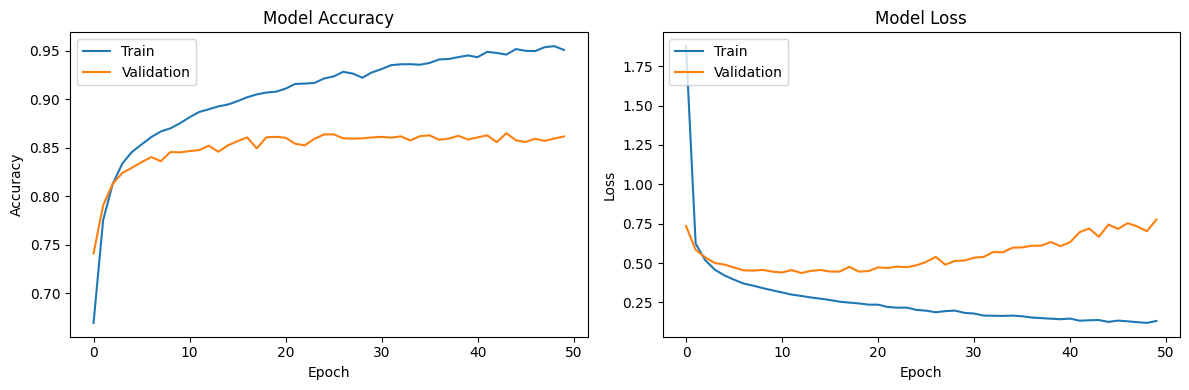

In [56]:
print(f"Final training accuracy: {history_lenet5.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history_lenet5.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {history_lenet5.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history_lenet5.history['val_loss'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lenet5.history['accuracy'])
plt.plot(history_lenet5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_lenet5.history['loss'])
plt.plot(history_lenet5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [57]:
# lenet5_baseline.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8586 - loss: 0.8310


[0.8346583247184753, 0.8557000160217285]

In [58]:
# from sklearn.metrics import confusion_matrix , classification_report

# y_pred_lenet5 = lenet5_baseline.predict(x_test)

# y_classes_lenet5 = [np.argmax(element) for element in y_pred_lenet5]
# print("Classification Report: \n", classification_report(y_test, y_classes_lenet5))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.82      0.79      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.78      0.77      1000
           3       0.88      0.86      0.87      1000
           4       0.74      0.79      0.76      1000
           5       0.96      0.95      0.96      1000
           6       0.67      0.55      0.60      1000
           7       0.93      0.95      0.94      1000
           8       0.92      0.96      0.94      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000



# ResNet-50 Implementation

In [59]:
from tensorflow.keras import layers, models

def create_resnet_block(inputs, filters, kernel_size=3, stride=1, conv_shortcut=False):
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    if conv_shortcut:
        shortcut = layers.Conv2D(filters, 1, strides=stride, padding='same')(inputs)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = inputs

    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def create_resnet():
    inputs = layers.Input(shape=(28, 28, 1))

    x = layers.Conv2D(32, 3, strides=1, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = create_resnet_block(x, 32)
    x = create_resnet_block(x, 32)

    x = create_resnet_block(x, 64, stride=2, conv_shortcut=True)
    x = create_resnet_block(x, 64)

    x = create_resnet_block(x, 128, stride=2, conv_shortcut=True)
    x = create_resnet_block(x, 128)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

# Create the ResNet model
resnet_baseline = create_resnet()

# Compile the model
resnet_baseline.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

history_resnet_baseline = resnet_baseline.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val), verbose=1)


resnet_baseline.summary()



Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 71s 149ms/step - accuracy: 0.7669 - loss: 0.6476 - val_accuracy: 0.7625 - val_loss: 0.6646
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8952 - loss: 0.2821 - val_accuracy: 0.8541 - val_loss: 0.4270
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9133 - loss: 0.2381 - val_accuracy: 0.8628 - val_loss: 0.3968
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9256 - loss: 0.2045 - val_accuracy: 0.8043 - val_loss: 0.5906
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9358 - loss: 0.1740 - val_accuracy: 0.9063 - val_loss: 0.2672
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9423 - loss: 0.1573 - val_accuracy: 0.8813 - val_loss: 0.3434
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9513 - loss: 0.1335 - val_accuracy: 0.8749 - val_loss: 0.3623
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9586 - loss: 0.1144 -

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 28, 28, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 28, 28, 32)     │            320 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_30    │ (None, 28, 28, 32)     │            128 │ conv2d_60[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_26             │ (None, 28, 28, 32)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 28, 28, 32)     │          9,248 │ activation_26[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_31    │ (None, 28, 28, 32)     │            128 │ conv2d_61[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_27             │ (None, 28, 28, 32)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 28, 28, 32)     │          9,248 │ activation_27[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_32    │ (None, 28, 28, 32)     │            128 │ conv2d_62[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_12 (Add)              │ (None, 28, 28, 32)     │              0 │ batch_normalization_3… │
│                           │                        │                │ activation_26[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_28             │ (None, 28, 28, 32)     │              0 │ add_12[0][0]           │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 28, 28, 32)     │          9,248 │ activation_28[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_33    │ (None, 28, 28, 32)     │            128 │ conv2d_63[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_29             │ (None, 28, 28, 32)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)   

 Total params: 2,143,264 (8.18 MB)

 Trainable params: 713,674 (2.72 MB)

 Non-trainable params: 2,240 (8.75 KB)

 Optimizer params: 1,427,350 (5.44 MB)

Final training accuracy: 0.9969
Final validation accuracy: 0.8817
Final training loss: 0.0090
Final validation loss: 0.8123


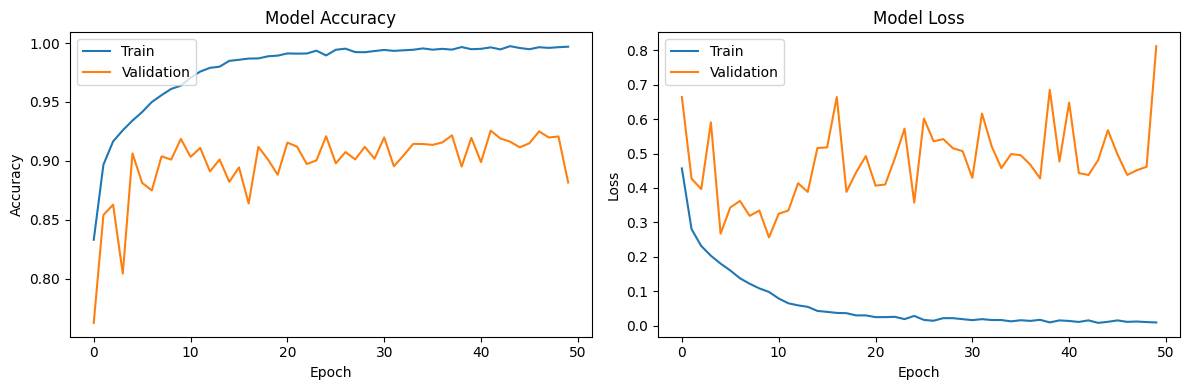

In [60]:
print(f"Final training accuracy: {history_resnet_baseline.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {history_resnet_baseline.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {history_resnet_baseline.history['loss'][-1]:.4f}")
print(f"Final validation loss: {history_resnet_baseline.history['val_loss'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_resnet_baseline.history['accuracy'])
plt.plot(history_resnet_baseline.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet_baseline.history['loss'])
plt.plot(history_resnet_baseline.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [61]:
# resnet_baseline.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8796 - loss: 0.8763


[0.8585803508758545, 0.8779000043869019]

In [62]:
# from sklearn.metrics import confusion_matrix , classification_report

# y_pred_resnet = resnet_baseline.predict(x_test)

# y_classes_resnet = [np.argmax(element) for element in y_pred_resnet]
# print("Classification Report: \n", classification_report(y_test, y_classes_resnet))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.93      0.84      1000
           1       1.00      0.94      0.97      1000
           2       0.71      0.94      0.81      1000
           3       0.89      0.89      0.89      1000
           4       0.99      0.47      0.64      1000
           5       0.99      0.95      0.97      1000
           6       0.69      0.75      0.72      1000
           7       0.91      0.99      0.95      1000
           8       0.99      0.96      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.87     10000
weighted avg       0.89      0.88      0.87     10000



# Hyperparameter Grid-Search for CNN

In [70]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [71]:
import keras_tuner as kt
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

def build_model(hp):
    model = models.Sequential()

    # First Convolutional Layer
    model.add(layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(28, 28, 1),
        kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log'))
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log'))
    ))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))

    model.add(layers.Flatten())

    # Dense Layer
    model.add(layers.Dense(
        units=64,
        activation='relu',
        kernel_regularizer=regularizers.l2(hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log'))
    ))
    model.add(layers.Dropout(hp.Float('dropout_3', min_value=0.0, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))
    else:
        opt = tf.keras.optimizers.SGD(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log'))

    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Set up the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='cnn_tuning'
)

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Perform the search
tuner.search(x_train, y_train,
             epochs=50,
             validation_data=(x_val, y_val),
             callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal hyperparameters are:
Optimizer: {best_hps.get('optimizer')}
Learning rate: {best_hps.get('learning_rate')}
L2 regularization: {best_hps.get('l2_reg')}
Dropout rates: {best_hps.get('dropout_1')}, {best_hps.get('dropout_2')}, {best_hps.get('dropout_3')}
""")

# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train,
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

Trial 90 Complete [00h 03m 44s]
val_accuracy: 0.9008333086967468

Best val_accuracy So Far: 0.9076666831970215
Total elapsed time: 01h 01m 50s

The hyperparameter search is complete. The optimal hyperparameters are:
Optimizer: adam
Learning rate: 0.000602765627984751
L2 regularization: 1.137176368923248e-05
Dropout rates: 0.1, 0.30000000000000004, 0.2

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2980 - loss: 4.7124 - val_accuracy: 0.6909 - val_loss: 0.9381
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5978 - loss: 1.1221 - val_accuracy: 0.7217 - val_loss: 0.7389
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6840 - loss: 0.8287 - val_accuracy: 0.8028 - val_loss: 0.5791
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7774 - loss: 0.6207 - val_accuracy: 0.8457 - val_loss: 0.4262
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8176 - loss: 0.4985 - val_accuracy: 0.8627 - val_loss: 0.

# Testing all baseline models

In [69]:
# from sklearn.metrics import confusion_matrix , classification_report

# y_pred_cnn = cnn.predict(x_test)

# y_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
# print("Classification Report - Baseline CNN: \n", classification_report(y_test, y_classes_cnn))

# print("\n\n")

# y_pred_alexnet = alexnet.predict(x_test)

# y_classes_alexnet = [np.argmax(element) for element in y_pred_alexnet]
# print("Classification Report - AlexNet: \n", classification_report(y_test, y_classes_alexnet))

# print("\n\n")

# y_pred_lenet5 = lenet5_baseline.predict(x_test)

# y_classes_lenet5 = [np.argmax(element) for element in y_pred_lenet5]
# print("Classification Report - LeNet5: \n", classification_report(y_test, y_classes_lenet5))

# print("\n\n")

# y_pred_resnet = resnet_baseline.predict(x_test)

# y_classes_resnet = [np.argmax(element) for element in y_pred_resnet]
# print("Classification Report - ResNet: \n", classification_report(y_test, y_classes_resnet))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report - Baseline CNN: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.84      0.81      1000
           3       0.88      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.58      0.64      1000
           7       0.95      0.96      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000




313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report - AlexNet: 
               precision    recall  f1-score   support

           0       0.82   